In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd
from prophet import Prophet
from forecastTable import forecastTable
from columnCleaner import columnCleaner

In [185]:
train_obs = pd.read_csv("data/observations_train.csv")
test_obs = pd.read_csv("data/observations_test.csv")
series = pd.read_csv("data/series.csv")

normalize = lambda col: (col-col.mean())/col.std()
normed_obs = train_obs.pivot_table(values="value", index="date", columns="series_id")
normed_obs = normed_obs.apply(normalize, axis=0)
test_obs['date'].unique()[-1]

'2021-02-12 00:00:00.0000000'

In [192]:
cols = list(set(series['series_id'].unique()) - set(['SP500']))
# cols = ["PCUADLVWRADLVWR",
# "PCUAINFOAINFO",
# "PCUAMUMAMUM",
# "PCUARETTRARETTR",
# "PCUASHCASHC",
# "PCUASTDSVASTDSV",
# "PCUATRADEATRADE",
# "PCUATRANSATRANS",
# "PCUATRNWRATRNWR",
# "PCUATTDSVATTDSV",
# "PCUAWHLTRAWHLTR",
# "PCUOMFGOMFG",
# "PCUOMINOMIN"]
features = columnCleaner("data/observations_train.csv", columns=cols)

Dropping Column: SOFR
Dropping Column: SOFRVOL
Dropping Column: DEXJPUS


Not included: DEXJPUS, SOFR, and SOFRVOL

In [193]:
m = Prophet()
dropped_cols = ["DEXJPUS", "SOFR", "SOFRVOL"]
for c in cols:
    if c not in dropped_cols:
        m.add_regressor(c, standardize=False)

In [194]:
m.fit(features)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [195]:
horizon = 900
cols = list(set(cols) - set(dropped_cols))
forecast = forecastTable(m,
                         horizon, 
                         "data/observations_train.csv", 
                         "data/observations_test.csv",
                        columns=cols)

In [196]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,AAA10Y,AAA10Y_lower,AAA10Y_upper,ASEANTOT,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-02-14,-1.134383,-1.104673,-0.956051,-1.134383,-1.134383,-0.005954,-0.005954,-0.005954,0.092970,...,0.030644,0.030644,0.030644,0.026624,0.026624,0.026624,0.0,0.0,0.0,-1.031551
1,2011-02-15,-1.133082,-1.105932,-0.958560,-1.133082,-1.133082,-0.024613,-0.024613,-0.024613,0.092970,...,0.030630,0.030630,0.030630,0.031088,0.031088,0.031088,0.0,0.0,0.0,-1.034921
2,2011-02-16,-1.131781,-1.124324,-0.983640,-1.131781,-1.131781,-0.024613,-0.024613,-0.024613,0.092970,...,0.027683,0.027683,0.027683,0.035156,0.035156,0.035156,0.0,0.0,0.0,-1.052337
3,2011-02-17,-1.130480,-1.116355,-0.962932,-1.130480,-1.130480,-0.033943,-0.033943,-0.033943,0.092970,...,0.025908,0.025908,0.025908,0.038811,0.038811,0.038811,0.0,0.0,0.0,-1.039013
4,2011-02-18,-1.129179,-1.075989,-0.935594,-1.129179,-1.129179,-0.040163,-0.040163,-0.040163,0.092970,...,0.025804,0.025804,0.025804,0.042044,0.042044,0.042044,0.0,0.0,0.0,-1.004918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,2020-06-14,5.245253,2.815388,3.184907,5.081259,5.415289,-0.071262,-0.071262,-0.071262,-0.041102,...,-0.070334,-0.070334,-0.070334,0.061882,0.061882,0.061882,0.0,0.0,0.0,2.994644
3409,2020-06-15,5.247188,2.910563,3.285701,5.082947,5.417437,-0.071262,-0.071262,-0.071262,-0.041102,...,0.030644,0.030644,0.030644,0.058900,0.058900,0.058900,0.0,0.0,0.0,3.094576
3410,2020-06-16,5.249123,3.001638,3.379545,5.084635,5.419585,-0.015283,-0.015283,-0.015283,-0.041102,...,0.030630,0.030630,0.030630,0.056015,0.056015,0.056015,0.0,0.0,0.0,3.186292
3411,2020-06-17,5.251059,2.980835,3.356936,5.086183,5.421717,-0.037053,-0.037053,-0.037053,-0.041102,...,0.027683,0.027683,0.027683,0.053281,0.053281,0.053281,0.0,0.0,0.0,3.162108


In [197]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ds'>

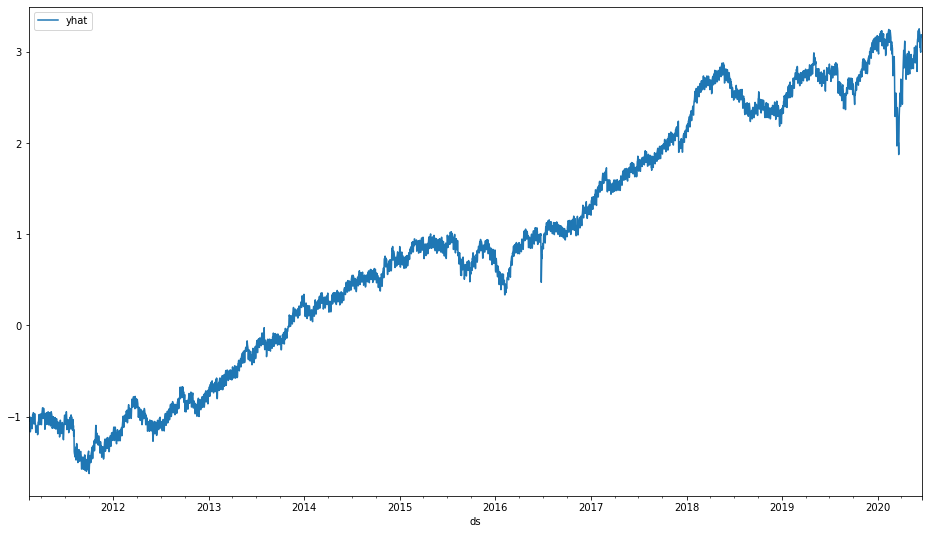

In [198]:
fig, ax = plt.subplots(figsize=(16, 9))
forecast[['ds', 'yhat']].plot("ds", ax=ax)
# ax.set_xlim(['2020-01-01', '2020-06-18'])

In [204]:
from prophet.utilities import regressor_coefficients

factors = regressor_coefficients(m)
factors['abs_coef'] = abs(factors['coef'])
factors.sort_values("abs_coef", ascending=True, inplace=True)
factors

,regressor,regressor_mode,center,coef_lower,coef,coef_upper,abs_coef
18,EFFR,additive,0.0,0.000786,0.000786,0.000786,0.000786
26,OBFRVOL,additive,0.0,0.001647,0.001647,0.001647,0.001647
55,EFFRVOL,additive,0.0,0.004903,0.004903,0.004903,0.004903
11,INFECTDISEMVTRACKD,additive,0.0,-0.007236,-0.007236,-0.007236,0.007236
54,UNRATE,additive,0.0,0.013213,0.013213,0.013213,0.013213
...,...,...,...,...,...,...,...
64,GVIPT54000S,additive,0.0,-1.155795,-1.155795,-1.155795,1.155795
41,PCUASTDSVASTDSV,additive,0.0,1.157177,1.157177,1.157177,1.157177
43,PCUATRANSATRANS,additive,0.0,-1.755882,-1.755882,-1.755882,1.755882
20,PCUATTDSVATTDSV,additive,0.0,-1.873861,-1.873861,-1.873861,1.873861


<AxesSubplot:ylabel='regressor'>

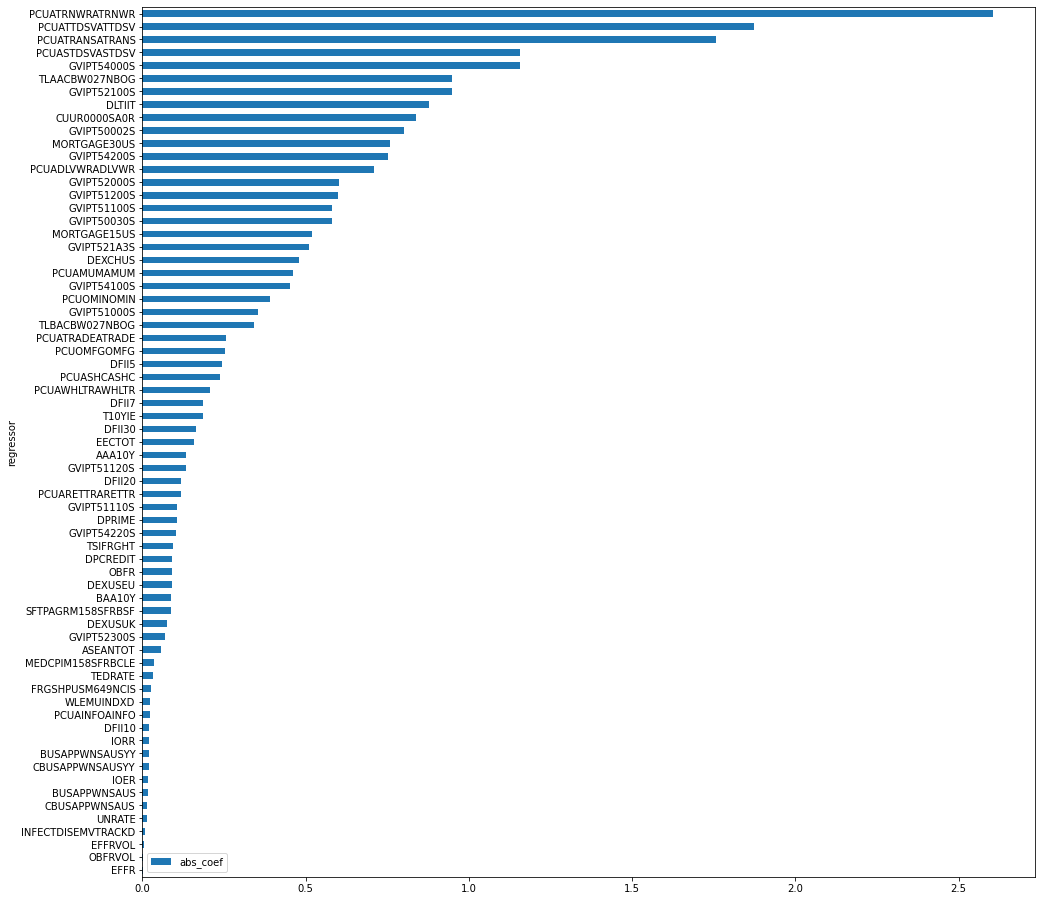

In [205]:
fig, ax = plt.subplots(figsize=(16, 16))
pcucols = ["PCUADLVWRADLVWR",
"PCUAINFOAINFO",
"PCUAMUMAMUM",
"PCUARETTRARETTR",
"PCUASHCASHC",
"PCUASTDSVASTDSV",
"PCUATRADEATRADE",
"PCUATRANSATRANS",
"PCUATRNWRATRNWR",
"PCUATTDSVATTDSV",
"PCUAWHLTRAWHLTR",
"PCUOMFGOMFG",
"PCUOMINOMIN"]
factors.plot.barh('regressor', 'abs_coef', ax=ax)

In [189]:
t = pd.concat([normed_obs.corr()['SP500'], normalize(factors.set_index("regressor")['coef'])], axis=1)

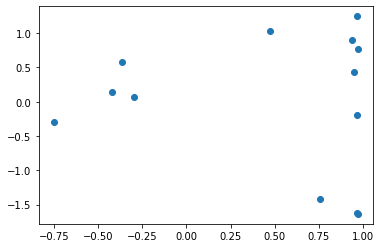

In [190]:
plt.scatter(t.SP500, t.coef)

In [ ]:
wild_cards = ['UNRATE', 'INFECTDISEMVTRACKD']
top_cols = factors